In [258]:
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import glob
import errno
import pandas as pd
from datetime import datetime
import time
import datetime
import xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import math
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split

In [259]:
path = '/home/vijeta/Documents/Dissertation/*.png'
files = glob.glob(path)
maplist = []
datelist = []
timelist = []
dtlist = []
# dtlistint = []
for name in files:
    try:
        with open(name) as f:
            filename = re.split("[map]", name)[-2][:-1]
            maplist.append(filename)
            date, time = re.split("_", filename)
#             print(date, time)
            mm, dd, yy = [date[i:i+2] for i in range(0, len(date), 2)]
            yy = '20'+yy
            hh, mi, ss = [time[i:i+2] for i in range(0, len(time), 2)]
#             print(mm, dd, yy)
#             print(hh, mi, ss)
            n_date = '-'.join([yy,mm,dd])
            datelist.append(n_date)
            n_time = ':'.join([hh,mi,ss])
            timelist.append(n_time)
            datetime = ' '.join([n_date,n_time])
#             a = int(datetime.strftime('%Y-%m-%d %H:%M:%S'))
            dtlist.append(datetime)
#             print(type(filename))
            #filename = "map"+ filename +"png"
#             maplist.append(filename)
#             dtlistint.append(a)
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise
print(datelist)

['2019-03-02', '2019-02-08', '2019-02-24', '2019-02-11', '2019-02-09', '2019-02-11', '2019-03-18', '2019-02-12', '2019-03-05', '2019-02-13', '2019-02-21', '2019-03-15', '2019-02-22', '2019-02-03', '2019-02-18', '2019-03-04', '2019-03-15', '2019-02-01', '2019-02-04', '2019-02-23', '2019-02-16', '2019-02-27', '2019-02-14', '2019-03-09', '2019-02-28', '2019-03-13', '2019-03-08', '2019-03-14', '2019-03-08', '2019-03-12', '2019-02-24', '2019-03-12', '2019-03-01', '2019-02-21', '2019-02-11', '2019-02-11', '2019-02-17', '2019-02-10', '2019-03-16', '2019-02-09', '2019-02-05', '2019-03-02', '2019-03-03', '2019-02-22', '2019-02-01', '2019-02-22', '2019-03-09', '2019-02-24', '2019-02-24', '2019-03-11', '2019-02-18', '2019-02-11', '2019-02-19', '2019-02-07', '2019-02-22', '2019-03-12', '2019-02-03', '2019-02-28', '2019-02-20', '2019-03-04', '2019-02-22', '2019-02-10', '2019-02-05', '2019-02-11', '2019-02-28', '2019-02-26', '2019-02-19', '2019-02-13', '2019-02-12', '2019-02-10', '2019-03-01', '2019

In [261]:
len(datelist)

4337

In [262]:
tdf = pd.read_excel('/home/vijeta/Documents/Dissertation/rahul_us_originaldataset.xls')
tdf['date.utc'] = tdf['date.utc'].astype(str)
tdf

,date.local,attribution,city,coordinates.latitude,coordinates.longitude,country,date.utc,location,parameter,unit,value
0,2019-02-01 03:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 00:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,132
1,2019-02-01 04:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 01:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,136
2,2019-02-01 05:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 02:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,122
3,2019-02-01 06:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 03:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,134
4,2019-02-01 07:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 04:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,166
5,2019-02-01 08:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 05:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,183
6,2019-02-01 09:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 06:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,170
7,2019-02-01 10:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 07:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,146
8,2019-02-01 11:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 08:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,52
9,2019-02-01 12:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 09:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,34


In [263]:
tdf.dtypes

date.local                object
attribution               object
city                      object
coordinates.latitude     float64
coordinates.longitude    float64
country                   object
date.utc                  object
location                  object
parameter                 object
unit                      object
value                      int64
dtype: object

In [264]:
tdf.isnull().values.any()

False

In [265]:
tdfxlist = list(tdf['date.utc'])
len(tdfxlist)

1046

In [266]:
from datetime import datetime
newdtmaplist = []
newtdfxlist = []
for j in dtlist:
    datetime_object = datetime.strptime(j, '%Y-%m-%d %H:%M:%S')
    newdtmaplist.append(datetime_object)
for j in tdfxlist:
    datetime_object = datetime.strptime(j, '%Y-%m-%d %H:%M:%S')
    newtdfxlist.append(datetime_object)

In [7]:
close = []
close_check = []
for i in range(len(newtdfxlist)):
    csv_row = newtdfxlist[i]
#     print(csv_row)
#     print("\n\n")
    differ =[]
    for j in range(len(newdtmaplist)):
        #print(newdtmaplist[j])
        #print(csv_row)
        if(newdtmaplist[j]>csv_row):
            diff = newdtmaplist[j] - csv_row
        else:
            diff = csv_row - newdtmaplist[j]
#         print(diff)
        differ.append(diff)
#         print(len(differ))
    minimum = min(differ)
#     print(minimum)
    ix = differ.index(minimum)
#     print(ix)
    closest = newdtmaplist[ix]
    close.append("map" + closest.strftime('%m%d%y_%H%M%S') + ".png")
    close_check.append("map" + closest.strftime('%m%d%y_%H%M%S') + ".png")

    close_check.append(csv_row.strftime("%Y-%m-%d %H:%M:%S"))

In [8]:
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import glob
import errno
files = []
for c in close:
#     print(c)
    path = '/home/vijeta/Documents/Dissertation/'+ c
    files.append(path)
# print(files)
# files = glob.glob(path)
sensor_coord = np.array([1672,1650])
bufferLength = 50
polygonSides = 360
checkfile = []
colour_int = []
for name in files:
    try:
        with open(name) as f:
#             print("Printing for : ", name)
#             print(f)
            img = Image.open(name)
            im1=np.array(img)
            x = sensor_coord[1]
            y = sensor_coord[0]

            points_list_large = []   
            for j in range(bufferLength):
                points_list = [ (x + np.sin(angle)*j, y + np.cos(angle)*j) 
                      for angle in np.linspace(0, 2*np.pi, polygonSides, endpoint = False) ]
                points_list_large.append(points_list)
#             print(points_list_large)
#             
            points_list_big = []
            for element in points_list_large:
                for elem in element:
                    points_list_big.append(elem)
#             print(points_list_big)
            points_list1 = [list(elem) for elem in points_list_big]
            # print(points_list1)
            points_list2=[[int(float(j)) for j in i] for i in points_list1]
            points_list_unique = [list(x) for x in set(tuple(x) for x in points_list2)]
#             print(points_list_unique)
            value_points_list = []
            for x in points_list_unique:
                value_points_list.append(im1[x[0],x[1]])
#             print
            value_points_list_trimmed = []
            for arr in value_points_list:
                arr = np.delete(arr, 3)
                value_points_list_trimmed.append(arr)
#             print(value_points_list_trimmed)

            colorofpixels = np.array(value_points_list_trimmed)

#             print(colorofpixels)
#             colortests = [[129,31,31],[242,60,50],[255,151,77],[99,214,104]]
            colortests = [[99,214,104], [255,151,77], [242,60,50], [129,31,31]]
            trafficdensity = np.full(colorofpixels.shape,np.nan)
#             print(trafficdensity)
#             trafficdensitylist = []
            for i, colortest in enumerate(colortests):
                pixelsthataretherightcolor = np.all(colorofpixels==np.array(colortest),axis=1)
                trafficdensity[pixelsthataretherightcolor] = i
            trafficnumbers = np.nanmean(trafficdensity)
#             print(trafficnumbers)
            filename = re.split("[map]", name)[-2]
#             print(type(filename))
            filename = "map"+ filename +"png"
#             print(filename)
            colour_int.append(filename)
            colour_int.append('{0:.3f}'.format(trafficnumbers))
            print(name)
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise

/home/vijeta/Documents/Dissertation/map020119_001320.png
/home/vijeta/Documents/Dissertation/map020119_005833.png
/home/vijeta/Documents/Dissertation/map020119_015849.png
/home/vijeta/Documents/Dissertation/map020119_025905.png
/home/vijeta/Documents/Dissertation/map020119_035918.png
/home/vijeta/Documents/Dissertation/map020119_054429.png
/home/vijeta/Documents/Dissertation/map020119_055933.png
/home/vijeta/Documents/Dissertation/map020119_065950.png
/home/vijeta/Documents/Dissertation/map020119_080006.png
/home/vijeta/Documents/Dissertation/map020119_090022.png
/home/vijeta/Documents/Dissertation/map020119_100035.png
/home/vijeta/Documents/Dissertation/map020119_110052.png
/home/vijeta/Documents/Dissertation/map020119_120110.png
/home/vijeta/Documents/Dissertation/map020119_130128.png
/home/vijeta/Documents/Dissertation/map020119_140145.png
/home/vijeta/Documents/Dissertation/map020119_150203.png
/home/vijeta/Documents/Dissertation/map020119_160220.png
/home/vijeta/Documents/Disserta

/home/vijeta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice


/home/vijeta/Documents/Dissertation/map020519_005800.png
/home/vijeta/Documents/Dissertation/map020519_015819.png
/home/vijeta/Documents/Dissertation/map020519_025838.png
/home/vijeta/Documents/Dissertation/map020519_035857.png
/home/vijeta/Documents/Dissertation/map020519_045916.png
/home/vijeta/Documents/Dissertation/map020519_055936.png
/home/vijeta/Documents/Dissertation/map020519_065955.png
/home/vijeta/Documents/Dissertation/map020519_080014.png
/home/vijeta/Documents/Dissertation/map020519_090034.png
/home/vijeta/Documents/Dissertation/map020519_100100.png
/home/vijeta/Documents/Dissertation/map020519_110124.png
/home/vijeta/Documents/Dissertation/map020519_120149.png
/home/vijeta/Documents/Dissertation/map020519_130218.png
/home/vijeta/Documents/Dissertation/map020519_140246.png
/home/vijeta/Documents/Dissertation/map020519_150313.png
/home/vijeta/Documents/Dissertation/map020519_160344.png
/home/vijeta/Documents/Dissertation/map020519_170405.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map021119_020611.png
/home/vijeta/Documents/Dissertation/map021119_030629.png
/home/vijeta/Documents/Dissertation/map021119_040648.png
/home/vijeta/Documents/Dissertation/map021119_050706.png
/home/vijeta/Documents/Dissertation/map021119_060723.png
/home/vijeta/Documents/Dissertation/map021119_065236.png
/home/vijeta/Documents/Dissertation/map021119_075254.png
/home/vijeta/Documents/Dissertation/map021119_085313.png
/home/vijeta/Documents/Dissertation/map021119_095333.png
/home/vijeta/Documents/Dissertation/map021119_105357.png
/home/vijeta/Documents/Dissertation/map021119_115422.png
/home/vijeta/Documents/Dissertation/map021119_125446.png
/home/vijeta/Documents/Dissertation/map021119_135511.png
/home/vijeta/Documents/Dissertation/map021119_145538.png
/home/vijeta/Documents/Dissertation/map021119_155602.png
/home/vijeta/Documents/Dissertation/map021119_165625.png
/home/vijeta/Documents/Dissertation/map021119_175648.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map021719_015823.png
/home/vijeta/Documents/Dissertation/map021719_025840.png
/home/vijeta/Documents/Dissertation/map021719_035858.png
/home/vijeta/Documents/Dissertation/map021719_045917.png
/home/vijeta/Documents/Dissertation/map021719_055935.png
/home/vijeta/Documents/Dissertation/map021719_065951.png
/home/vijeta/Documents/Dissertation/map021719_080007.png
/home/vijeta/Documents/Dissertation/map021719_090025.png
/home/vijeta/Documents/Dissertation/map021719_100047.png
/home/vijeta/Documents/Dissertation/map021719_110107.png
/home/vijeta/Documents/Dissertation/map021719_120128.png
/home/vijeta/Documents/Dissertation/map021719_130147.png
/home/vijeta/Documents/Dissertation/map021719_140207.png
/home/vijeta/Documents/Dissertation/map021719_150226.png
/home/vijeta/Documents/Dissertation/map021719_160244.png
/home/vijeta/Documents/Dissertation/map021719_170307.png
/home/vijeta/Documents/Dissertation/map021719_180332.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map022319_025957.png
/home/vijeta/Documents/Dissertation/map022319_040013.png
/home/vijeta/Documents/Dissertation/map022319_050029.png
/home/vijeta/Documents/Dissertation/map022319_060044.png
/home/vijeta/Documents/Dissertation/map022319_070059.png
/home/vijeta/Documents/Dissertation/map022319_080116.png
/home/vijeta/Documents/Dissertation/map022319_090134.png
/home/vijeta/Documents/Dissertation/map022319_100154.png
/home/vijeta/Documents/Dissertation/map022319_110223.png
/home/vijeta/Documents/Dissertation/map022319_120241.png
/home/vijeta/Documents/Dissertation/map022319_130259.png
/home/vijeta/Documents/Dissertation/map022319_140318.png
/home/vijeta/Documents/Dissertation/map022319_150337.png
/home/vijeta/Documents/Dissertation/map022319_160357.png
/home/vijeta/Documents/Dissertation/map022319_170416.png
/home/vijeta/Documents/Dissertation/map022319_180436.png
/home/vijeta/Documents/Dissertation/map022319_190500.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map030119_025842.png
/home/vijeta/Documents/Dissertation/map030119_035858.png
/home/vijeta/Documents/Dissertation/map030119_045913.png
/home/vijeta/Documents/Dissertation/map030119_055929.png
/home/vijeta/Documents/Dissertation/map030119_065944.png
/home/vijeta/Documents/Dissertation/map030119_080002.png
/home/vijeta/Documents/Dissertation/map030119_090021.png
/home/vijeta/Documents/Dissertation/map030119_100040.png
/home/vijeta/Documents/Dissertation/map030119_110059.png
/home/vijeta/Documents/Dissertation/map030119_120120.png
/home/vijeta/Documents/Dissertation/map030119_130139.png
/home/vijeta/Documents/Dissertation/map030119_140157.png
/home/vijeta/Documents/Dissertation/map030119_150214.png
/home/vijeta/Documents/Dissertation/map030119_160233.png
/home/vijeta/Documents/Dissertation/map030119_170255.png
/home/vijeta/Documents/Dissertation/map030119_180318.png
/home/vijeta/Documents/Dissertation/map030119_190339.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map030719_035749.png
/home/vijeta/Documents/Dissertation/map030719_045804.png
/home/vijeta/Documents/Dissertation/map030719_055820.png
/home/vijeta/Documents/Dissertation/map030719_065835.png
/home/vijeta/Documents/Dissertation/map030719_075855.png
/home/vijeta/Documents/Dissertation/map030719_085914.png
/home/vijeta/Documents/Dissertation/map030719_095934.png
/home/vijeta/Documents/Dissertation/map030719_105955.png
/home/vijeta/Documents/Dissertation/map030719_120014.png
/home/vijeta/Documents/Dissertation/map030719_130032.png
/home/vijeta/Documents/Dissertation/map030719_140050.png
/home/vijeta/Documents/Dissertation/map030719_150110.png
/home/vijeta/Documents/Dissertation/map030719_160130.png
/home/vijeta/Documents/Dissertation/map030719_170152.png
/home/vijeta/Documents/Dissertation/map030719_180211.png
/home/vijeta/Documents/Dissertation/map030719_190230.png
/home/vijeta/Documents/Dissertation/map030719_200250.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map031519_075750.png
/home/vijeta/Documents/Dissertation/map031519_085808.png
/home/vijeta/Documents/Dissertation/map031519_095825.png
/home/vijeta/Documents/Dissertation/map031519_105842.png
/home/vijeta/Documents/Dissertation/map031519_115901.png
/home/vijeta/Documents/Dissertation/map031519_125920.png
/home/vijeta/Documents/Dissertation/map031519_135944.png
/home/vijeta/Documents/Dissertation/map031519_150008.png
/home/vijeta/Documents/Dissertation/map031519_160033.png
/home/vijeta/Documents/Dissertation/map031519_170055.png
/home/vijeta/Documents/Dissertation/map031519_180117.png
/home/vijeta/Documents/Dissertation/map031519_190137.png
/home/vijeta/Documents/Dissertation/map031519_200201.png
/home/vijeta/Documents/Dissertation/map031519_210224.png
/home/vijeta/Documents/Dissertation/map031519_220245.png
/home/vijeta/Documents/Dissertation/map031519_230304.png
/home/vijeta/Documents/Dissertation/map031619_000320.png
/home/vijeta/Documents/Disserta

In [36]:
print(len(colour_int))

2092


In [96]:
print(str(colour_int))

['map020119_001320.png', '2.894', 'map020119_005833.png', '3.000', 'map020119_015849.png', '3.000', 'map020119_025905.png', '3.000', 'map020119_035918.png', '2.800', 'map020119_054429.png', '2.912', 'map020119_055933.png', '3.000', 'map020119_065950.png', '2.830', 'map020119_080006.png', '2.661', 'map020119_090022.png', '2.678', 'map020119_100035.png', '2.505', 'map020119_110052.png', '2.914', 'map020119_120110.png', '2.607', 'map020119_130128.png', '2.656', 'map020119_140145.png', '2.759', 'map020119_150203.png', '2.828', 'map020119_160220.png', '2.826', 'map020119_170239.png', '2.738', 'map020119_180256.png', '3.000', 'map020119_190313.png', '2.826', 'map020119_200329.png', '2.915', 'map020119_210346.png', '2.914', 'map020119_220402.png', '2.911', 'map020119_230420.png', '2.917', 'map020219_000439.png', '2.917', 'map020219_010457.png', '2.911', 'map020219_020516.png', '3.000', 'map020219_030534.png', '3.000', 'map020219_040553.png', '3.000', 'map020219_050612.png', '2.982', 'map02021

In [115]:
#convert the dateTimeUTC to date.utc format in excel itself
df = pd.read_csv('tahmo_Makerere_Synopticdata_febmarch_original.csv')
df

,site,name,dateTimeUTC,date.utc,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),winddirection,windspeed (m/s)
0,TA00216,Makerere Synoptic,01/02/19 00:00,2019-02-01 00:00:00,83,0.00,87.59,0.00,19.92,S,0.52
1,TA00216,Makerere Synoptic,01/02/19 01:00,2019-02-01 01:00:00,90,0.02,87.60,0.00,19.76,W,0.56
2,TA00216,Makerere Synoptic,01/02/19 02:00,2019-02-01 02:00:00,93,0.03,87.63,0.00,19.14,S,0.54
3,TA00216,Makerere Synoptic,01/02/19 03:00,2019-02-01 03:00:00,92,0.02,87.68,0.08,19.08,SW,0.57
4,TA00216,Makerere Synoptic,01/02/19 04:00,2019-02-01 04:00:00,93,0.02,87.72,14.18,18.91,S,0.62
5,TA00216,Makerere Synoptic,01/02/19 05:00,2019-02-01 05:00:00,89,0.00,87.81,51.83,20.33,S,0.50
6,TA00216,Makerere Synoptic,01/02/19 06:00,2019-02-01 06:00:00,77,0.00,87.88,304.40,23.88,SE,0.51
7,TA00216,Makerere Synoptic,01/02/19 07:00,2019-02-01 07:00:00,61,0.00,87.90,493.10,29.17,SE,2.79
8,TA00216,Makerere Synoptic,01/02/19 08:00,2019-02-01 08:00:00,58,0.00,87.88,550.48,29.99,SE,3.46
9,TA00216,Makerere Synoptic,01/02/19 09:00,2019-02-01 09:00:00,61,0.00,87.79,440.25,29.55,SE,3.43


In [116]:
tdf

,date.local,attribution,city,coordinates.latitude,coordinates.longitude,country,date.utc,location,parameter,unit,value
0,2019-02-01 03:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 00:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,132
1,2019-02-01 04:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 01:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,136
2,2019-02-01 05:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 02:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,122
3,2019-02-01 06:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 03:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,134
4,2019-02-01 07:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 04:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,166
5,2019-02-01 08:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 05:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,183
6,2019-02-01 09:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 06:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,170
7,2019-02-01 10:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 07:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,146
8,2019-02-01 11:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 08:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,52
9,2019-02-01 12:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-02-01 09:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,34


In [118]:
merge_df = pd.merge(df, tdf, on="date.utc")
merge_df

,site,name,dateTimeUTC,date.utc,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),winddirection,...,date.local,attribution,city,coordinates.latitude,coordinates.longitude,country,location,parameter,unit,value
0,TA00216,Makerere Synoptic,01/02/19 00:00,2019-02-01 00:00:00,83,0.00,87.59,0.00,19.92,S,...,2019-02-01 03:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,US Diplomatic Post: Kampala,pm25,µg/m³,132
1,TA00216,Makerere Synoptic,01/02/19 01:00,2019-02-01 01:00:00,90,0.02,87.60,0.00,19.76,W,...,2019-02-01 04:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,US Diplomatic Post: Kampala,pm25,µg/m³,136
2,TA00216,Makerere Synoptic,01/02/19 02:00,2019-02-01 02:00:00,93,0.03,87.63,0.00,19.14,S,...,2019-02-01 05:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,US Diplomatic Post: Kampala,pm25,µg/m³,122
3,TA00216,Makerere Synoptic,01/02/19 03:00,2019-02-01 03:00:00,92,0.02,87.68,0.08,19.08,SW,...,2019-02-01 06:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,US Diplomatic Post: Kampala,pm25,µg/m³,134
4,TA00216,Makerere Synoptic,01/02/19 04:00,2019-02-01 04:00:00,93,0.02,87.72,14.18,18.91,S,...,2019-02-01 07:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,US Diplomatic Post: Kampala,pm25,µg/m³,166
5,TA00216,Makerere Synoptic,01/02/19 05:00,2019-02-01 05:00:00,89,0.00,87.81,51.83,20.33,S,...,2019-02-01 08:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,US Diplomatic Post: Kampala,pm25,µg/m³,183
6,TA00216,Makerere Synoptic,01/02/19 06:00,2019-02-01 06:00:00,77,0.00,87.88,304.40,23.88,SE,...,2019-02-01 09:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,US Diplomatic Post: Kampala,pm25,µg/m³,170
7,TA00216,Makerere Synoptic,01/02/19 07:00,2019-02-01 07:00:00,61,0.00,87.90,493.10,29.17,SE,...,2019-02-01 10:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,US Diplomatic Post: Kampala,pm25,µg/m³,146
8,TA00216,Makerere Synoptic,01/02/19 08:00,2019-02-01 08:00:00,58,0.00,87.88,550.48,29.99,SE,...,2019-02-01 11:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,US Diplomatic Post: Kampala,pm25,µg/m³,52
9,TA00216,Makerere Synoptic,01/02/19 09:00,2019-02-01 09:00:00,61,0.00,87.79,440.25,29.55,SE,...,2019-02-01 12:00:00+03:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,US Diplomatic Post: Kampala,pm25,µg/m³,34


In [119]:
merge_df.isnull().values.any()

False

In [120]:
tradf = pd.DataFrame(np.array(colour_int).reshape(int(len(colour_int)/2),2))
csvdf = pd.DataFrame(np.array(tdfxlist).reshape(len(tdfxlist),1))
# tradf = tradf.rename(columns={0: 'maps', 1:'trafficnumbers'})
# csvdf = csvdf.rename(columns={0: 'date.utc'})
# joindf = pd.concat([tradf,csvdf], axis=1)

In [121]:
len(tdfxlist)

1046

In [122]:
df = pd.merge(merge_df, joindf, on="date.utc")
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('date.utc'))
cols.pop(cols.index('maps'))
df = df[cols+['maps','date.utc']]
df[['year','month','day']] = df['date.utc'].str.split('-',expand = True)
df[['day','time']] = df['day'].str.split(' ',expand = True)
df[['hour','min','sec']] = df['time'].str.split(':',expand = True)
coldrop = ['year','time', 'min', 'sec']
df = df.drop(coldrop, axis=1)
df['month'] = pd.to_numeric(df['month'])
df['day'] = pd.to_numeric(df['day'])
df['hour'] = pd.to_numeric(df['hour'])
df

,site,name,dateTimeUTC,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),winddirection,windspeed (m/s),...,location,parameter,unit,value,trafficnumbers,maps,date.utc,month,day,hour
0,TA00216,Makerere Synoptic,01/02/19 00:00,83,0.00,87.59,0.00,19.92,S,0.52,...,US Diplomatic Post: Kampala,pm25,µg/m³,132,2.894,map020119_001320.png,2019-02-01 00:00:00,2,1,0
1,TA00216,Makerere Synoptic,01/02/19 01:00,90,0.02,87.60,0.00,19.76,W,0.56,...,US Diplomatic Post: Kampala,pm25,µg/m³,136,3.000,map020119_005833.png,2019-02-01 01:00:00,2,1,1
2,TA00216,Makerere Synoptic,01/02/19 02:00,93,0.03,87.63,0.00,19.14,S,0.54,...,US Diplomatic Post: Kampala,pm25,µg/m³,122,3.000,map020119_015849.png,2019-02-01 02:00:00,2,1,2
3,TA00216,Makerere Synoptic,01/02/19 03:00,92,0.02,87.68,0.08,19.08,SW,0.57,...,US Diplomatic Post: Kampala,pm25,µg/m³,134,3.000,map020119_025905.png,2019-02-01 03:00:00,2,1,3
4,TA00216,Makerere Synoptic,01/02/19 04:00,93,0.02,87.72,14.18,18.91,S,0.62,...,US Diplomatic Post: Kampala,pm25,µg/m³,166,2.800,map020119_035918.png,2019-02-01 04:00:00,2,1,4
5,TA00216,Makerere Synoptic,01/02/19 05:00,89,0.00,87.81,51.83,20.33,S,0.50,...,US Diplomatic Post: Kampala,pm25,µg/m³,183,2.912,map020119_054429.png,2019-02-01 05:00:00,2,1,5
6,TA00216,Makerere Synoptic,01/02/19 06:00,77,0.00,87.88,304.40,23.88,SE,0.51,...,US Diplomatic Post: Kampala,pm25,µg/m³,170,3.000,map020119_055933.png,2019-02-01 06:00:00,2,1,6
7,TA00216,Makerere Synoptic,01/02/19 07:00,61,0.00,87.90,493.10,29.17,SE,2.79,...,US Diplomatic Post: Kampala,pm25,µg/m³,146,2.830,map020119_065950.png,2019-02-01 07:00:00,2,1,7
8,TA00216,Makerere Synoptic,01/02/19 08:00,58,0.00,87.88,550.48,29.99,SE,3.46,...,US Diplomatic Post: Kampala,pm25,µg/m³,52,2.661,map020119_080006.png,2019-02-01 08:00:00,2,1,8
9,TA00216,Makerere Synoptic,01/02/19 09:00,61,0.00,87.79,440.25,29.55,SE,3.43,...,US Diplomatic Post: Kampala,pm25,µg/m³,34,2.678,map020119_090022.png,2019-02-01 09:00:00,2,1,9


In [232]:
df = df[df.value != -999]
df

,site,name,dateTimeUTC,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),winddirection,windspeed (m/s),...,location,parameter,unit,value,trafficnumbers,maps,date.utc,month,day,hour
0,TA00216,Makerere Synoptic,01/02/19 00:00,83,0.00,87.59,0.00,19.92,S,0.52,...,US Diplomatic Post: Kampala,pm25,µg/m³,132,2.894,map020119_001320.png,2019-02-01 00:00:00,2,1,0
1,TA00216,Makerere Synoptic,01/02/19 01:00,90,0.02,87.60,0.00,19.76,W,0.56,...,US Diplomatic Post: Kampala,pm25,µg/m³,136,3.000,map020119_005833.png,2019-02-01 01:00:00,2,1,1
2,TA00216,Makerere Synoptic,01/02/19 02:00,93,0.03,87.63,0.00,19.14,S,0.54,...,US Diplomatic Post: Kampala,pm25,µg/m³,122,3.000,map020119_015849.png,2019-02-01 02:00:00,2,1,2
3,TA00216,Makerere Synoptic,01/02/19 03:00,92,0.02,87.68,0.08,19.08,SW,0.57,...,US Diplomatic Post: Kampala,pm25,µg/m³,134,3.000,map020119_025905.png,2019-02-01 03:00:00,2,1,3
4,TA00216,Makerere Synoptic,01/02/19 04:00,93,0.02,87.72,14.18,18.91,S,0.62,...,US Diplomatic Post: Kampala,pm25,µg/m³,166,2.800,map020119_035918.png,2019-02-01 04:00:00,2,1,4
5,TA00216,Makerere Synoptic,01/02/19 05:00,89,0.00,87.81,51.83,20.33,S,0.50,...,US Diplomatic Post: Kampala,pm25,µg/m³,183,2.912,map020119_054429.png,2019-02-01 05:00:00,2,1,5
6,TA00216,Makerere Synoptic,01/02/19 06:00,77,0.00,87.88,304.40,23.88,SE,0.51,...,US Diplomatic Post: Kampala,pm25,µg/m³,170,3.000,map020119_055933.png,2019-02-01 06:00:00,2,1,6
7,TA00216,Makerere Synoptic,01/02/19 07:00,61,0.00,87.90,493.10,29.17,SE,2.79,...,US Diplomatic Post: Kampala,pm25,µg/m³,146,2.830,map020119_065950.png,2019-02-01 07:00:00,2,1,7
8,TA00216,Makerere Synoptic,01/02/19 08:00,58,0.00,87.88,550.48,29.99,SE,3.46,...,US Diplomatic Post: Kampala,pm25,µg/m³,52,2.661,map020119_080006.png,2019-02-01 08:00:00,2,1,8
9,TA00216,Makerere Synoptic,01/02/19 09:00,61,0.00,87.79,440.25,29.55,SE,3.43,...,US Diplomatic Post: Kampala,pm25,µg/m³,34,2.678,map020119_090022.png,2019-02-01 09:00:00,2,1,9


In [233]:
dfclean = df.drop(df.columns[[0, 1, 2, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22]], axis=1)
dfclean = dfclean[dfclean.trafficnumbers != 'nan']

In [251]:
dfclean

,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),value,trafficnumbers,month,day,hour
0,83,0.00,87.59,0.00,19.92,0.52,132,2.894,2,1,0
1,90,0.02,87.60,0.00,19.76,0.56,136,3.000,2,1,1
2,93,0.03,87.63,0.00,19.14,0.54,122,3.000,2,1,2
3,92,0.02,87.68,0.08,19.08,0.57,134,3.000,2,1,3
4,93,0.02,87.72,14.18,18.91,0.62,166,2.800,2,1,4
5,89,0.00,87.81,51.83,20.33,0.50,183,2.912,2,1,5
6,77,0.00,87.88,304.40,23.88,0.51,170,3.000,2,1,6
7,61,0.00,87.90,493.10,29.17,2.79,146,2.830,2,1,7
8,58,0.00,87.88,550.48,29.99,3.46,52,2.661,2,1,8
9,61,0.00,87.79,440.25,29.55,3.43,34,2.678,2,1,9


In [252]:
dfnew = dfclean.drop(dfclean.columns[[0, 1, 2, 3, 4, 5]], axis =1)
dfnew = dfclean.drop(dfclean.columns[[0, 1, 2, 3, 4, 5]], axis =1)
dfnew

,value,trafficnumbers,month,day,hour
0,132,2.894,2,1,0
1,136,3.000,2,1,1
2,122,3.000,2,1,2
3,134,3.000,2,1,3
4,166,2.800,2,1,4
5,183,2.912,2,1,5
6,170,3.000,2,1,6
7,146,2.830,2,1,7
8,52,2.661,2,1,8
9,34,2.678,2,1,9


In [236]:
dfnew['xhr'] = np.sin(2*np.pi*dfnew['hour']/24)
dfnew['yhr'] = np.cos(2*np.pi*dfnew['hour']/24)
dfnew = dfnew.drop(dfnew.columns[[2, 3]], axis =1)
dfnew = dfnew.drop(dfnew.columns[[2]], axis =1)
dfnew

,value,trafficnumbers,hour
0,132,2.894,0
1,136,3.000,1
2,122,3.000,2
3,134,3.000,3
4,166,2.800,4
5,183,2.912,5
6,170,3.000,6
7,146,2.830,7
8,52,2.661,8
9,34,2.678,9


In [237]:
dfnew.shape

(999, 3)

In [238]:
# dfval = dfnew['value']

In [239]:
# dfval.shape

(999,)

In [240]:
x = dfnew.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfnew = pd.DataFrame(x_scaled, columns = dfnew.columns)
dfnew

/home/vijeta/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,value,trafficnumbers,hour
0,0.646739,0.914791,0.000000
1,0.668478,1.000000,0.043478
2,0.592391,1.000000,0.086957
3,0.657609,1.000000,0.130435
4,0.831522,0.839228,0.173913
5,0.923913,0.929260,0.217391
6,0.853261,1.000000,0.260870
7,0.722826,0.863344,0.304348
8,0.211957,0.727492,0.347826
9,0.114130,0.741158,0.391304


In [151]:
# dfnew.shape

(999, 4)

In [152]:
# dfval.shape

(999,)

In [154]:
# dfnew.isnull().values.any()

False

In [169]:
# pd.concat([dfnew,dfval])

In [241]:
cols = dfnew.columns.tolist()
cols = cols[1:] + cols[:1]
dfnew = dfnew[cols]
print(dfnew.describe())
print(dfnew.info())

       trafficnumbers        hour       value
count      999.000000  999.000000  999.000000
mean         0.844203    0.497889    0.253819
std          0.165136    0.297631    0.162172
min          0.000000    0.000000    0.000000
25%          0.760048    0.260870    0.130435
50%          0.873794    0.478261    0.217391
75%          1.000000    0.739130    0.336957
max          1.000000    1.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
trafficnumbers    999 non-null float64
hour              999 non-null float64
value             999 non-null float64
dtypes: float64(3)
memory usage: 23.5 KB
None


In [242]:
dfnew = dfnew.dropna()

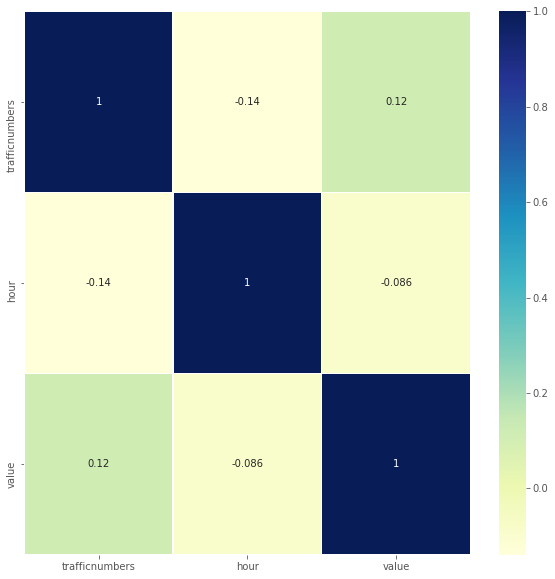

In [243]:
plt.figure(figsize=[10,10])
corr = dfnew.corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True,linewidths=.3,linecolor='white',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [244]:
dfnew.shape

(999, 3)

In [247]:
y = dfnew['value']
X = dfnew.drop(['value'], axis=1)

# from sklearn.model_selection import train_test_split



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [205]:
print(X_test)

     trafficnumbers       xhr       yhr
874        0.718650  0.370590  0.017037
277        0.920418  0.370590  0.982963
118        0.931672  0.933013  0.750000
766        1.000000  0.066987  0.750000
99         0.864148  0.853553  0.146447
330        0.933280  0.982963  0.629410
40         1.000000  0.066987  0.250000
570        0.737138  0.500000  0.000000
738        0.861736  0.066987  0.250000
310        0.571543  0.853553  0.146447
479        0.375402  0.146447  0.146447
214        0.870579  0.933013  0.750000
148        0.578778  0.750000  0.066987
29         0.985531  0.982963  0.629410
674        1.000000  0.250000  0.933013
677        1.000000  0.629410  0.982963
519        0.930868  0.982963  0.370590
347        0.931672  0.250000  0.933013
156        0.876206  0.000000  0.500000
484        0.933280  0.066987  0.750000
665        0.530547  0.370590  0.017037
78         0.662379  0.629410  0.017037
914        0.702572  0.982963  0.629410
496        0.931672  0.933013  0.250000


In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
a = regr.fit(X_train, y_train)
# Make predictions using the testing set
lin_pred = regr.predict(X_test)
# lin_pred1 = np.array(lin_pred)
# y_test1 = np.array(y_test)
# linear_regression_score = regr.score(lin_pred1.reshape(-1, 1), y_test1.reshape(-1, 1))
# print(linear_regression_score)

from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [-0.05425381  0.06504844  0.16602651]
Root mean squared error: 0.15
Mean absolute error: 0.11
R-squared: 0.09


In [207]:
t = regr.coef_/np.std(X_train, 0)
print(t)

trafficnumbers   -0.322897
xhr               0.180940
yhr               0.477814
dtype: float64


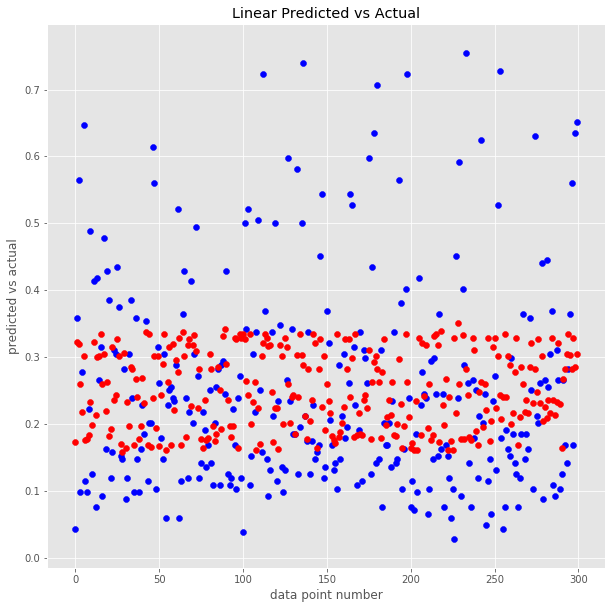

In [208]:
plt.figure(figsize=[10,10])
plt.scatter(range(0,len(lin_pred)),y_test, color = 'b')
plt.scatter(range(0,len(lin_pred)),lin_pred, color = 'r')
# plt.scatter(lin_pred)
plt.xlabel('data point number')
plt.ylabel('predicted vs actual')
plt.title('Linear Predicted vs Actual')
plt.show()

In [248]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


y = dfnew['value']
X = dfnew1
X -= np.mean(X,0)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     9.299
Date:                Mon, 12 Aug 2019   Prob (F-statistic):           9.97e-05
Time:                        18:05:02   Log-Likelihood:                 409.50
No. Observations:                 999   AIC:                            -813.0
Df Residuals:                     996   BIC:                            -798.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2538      0.005     49.

In [249]:
X = dfnew1.as_matrix()

/home/vijeta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


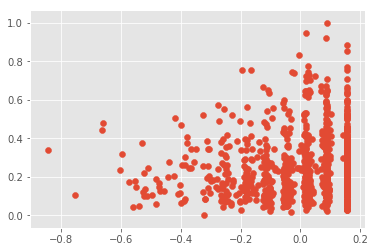

In [250]:
plt.scatter(X[:,0],y)

In [229]:
plt.plot()

[[ 7.05882732e-02 -8.70755198e-05  5.07310171e-01]
 [ 1.55797276e-01  1.29322447e-01  4.90273084e-01]
 [ 1.55797276e-01  2.49912924e-01  4.40322873e-01]
 ...
 [-1.81019444e-01 -4.33099777e-01  2.57310171e-01]
 [-1.81019444e-01 -3.53640466e-01  3.60863562e-01]
 [-1.81019444e-01 -2.50087076e-01  4.40322873e-01]]


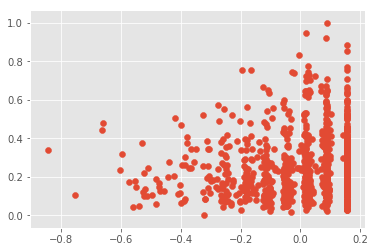

In [253]:
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import glob
import errno
import pandas as pd
from datetime import datetime
import time
import datetime
import xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import math
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [275]:
def predPolTraf(x_c, y_c, buff):
    path = '/home/vijeta/Documents/Dissertation/*.png'
    files = glob.glob(path)
    maplist = []
    datelist = []
    timelist = []
    dtlist = []
    # dtlistint = []
    for name in files:
        try:
            with open(name) as f:
                filename = re.split("[map]", name)[-2][:-1]
                maplist.append(filename)
                date, time = re.split("_", filename)
    #             print(date, time)
                mm, dd, yy = [date[i:i+2] for i in range(0, len(date), 2)]
                yy = '20'+yy
                hh, mi, ss = [time[i:i+2] for i in range(0, len(time), 2)]
    #             print(mm, dd, yy)
    #             print(hh, mi, ss)
                n_date = '-'.join([yy,mm,dd])
                datelist.append(n_date)
                n_time = ':'.join([hh,mi,ss])
                timelist.append(n_time)
                datetime = ' '.join([n_date,n_time])
    #             a = int(datetime.strftime('%Y-%m-%d %H:%M:%S'))
                dtlist.append(datetime)
    #             print(type(filename))
                #filename = "map"+ filename +"png"
    #             maplist.append(filename)
    #             dtlistint.append(a)
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise
#     print(datelist)
    tdf = pd.read_excel('/home/vijeta/Documents/Dissertation/rahul_us_originaldataset.xls')
    tdf['date.utc'] = tdf['date.utc'].astype(str)
    tdfxlist = list(tdf['date.utc'])
    from datetime import datetime
    newdtmaplist = []
    newtdfxlist = []
    for j in dtlist:
        datetime_object = datetime.strptime(j, '%Y-%m-%d %H:%M:%S')
        newdtmaplist.append(datetime_object)
    for j in tdfxlist:
        datetime_object = datetime.strptime(j, '%Y-%m-%d %H:%M:%S')
        newtdfxlist.append(datetime_object)
    close = []
    close_check = []
    for i in range(len(newtdfxlist)):
        csv_row = newtdfxlist[i]
    #     print(csv_row)
    #     print("\n\n")
        differ =[]
        for j in range(len(newdtmaplist)):
            #print(newdtmaplist[j])
            #print(csv_row)
            if(newdtmaplist[j]>csv_row):
                diff = newdtmaplist[j] - csv_row
            else:
                diff = csv_row - newdtmaplist[j]
    #         print(diff)
            differ.append(diff)
    #         print(len(differ))
        minimum = min(differ)
    #     print(minimum)
        ix = differ.index(minimum)
    #     print(ix)
        closest = newdtmaplist[ix]
        close.append("map" + closest.strftime('%m%d%y_%H%M%S') + ".png")
        close_check.append("map" + closest.strftime('%m%d%y_%H%M%S') + ".png")
        close_check.append(csv_row.strftime("%Y-%m-%d %H:%M:%S"))
    files = []
    for c in close:
    #     print(c)
        path = '/home/vijeta/Documents/Dissertation/'+ c
        files.append(path)
    # print(files)
    # files = glob.glob(path)
    sensor_coord = np.array([x_c,y_c])
    bufferLength = buff
    polygonSides = 360
    checkfile = []
    colour_int = []
    for name in files:
        try:
            with open(name) as f:
    #             print("Printing for : ", name)
    #             print(f)
                img = Image.open(name)
                im1=np.array(img)
                x = sensor_coord[1]
                y = sensor_coord[0]

                points_list_large = []   
                for j in range(bufferLength):
                    points_list = [ (x + np.sin(angle)*j, y + np.cos(angle)*j) 
                          for angle in np.linspace(0, 2*np.pi, polygonSides, endpoint = False) ]
                    points_list_large.append(points_list)
    #             print(points_list_large)
    #             
                points_list_big = []
                for element in points_list_large:
                    for elem in element:
                        points_list_big.append(elem)
    #             print(points_list_big)
                points_list1 = [list(elem) for elem in points_list_big]
                # print(points_list1)
                points_list2=[[int(float(j)) for j in i] for i in points_list1]
                points_list_unique = [list(x) for x in set(tuple(x) for x in points_list2)]
    #             print(points_list_unique)
                value_points_list = []
                for x in points_list_unique:
                    value_points_list.append(im1[x[0],x[1]])
    #             print
                value_points_list_trimmed = []
                for arr in value_points_list:
                    arr = np.delete(arr, 3)
                    value_points_list_trimmed.append(arr)
    #             print(value_points_list_trimmed)

                colorofpixels = np.array(value_points_list_trimmed)

    #             print(colorofpixels)
    #             colortests = [[129,31,31],[242,60,50],[255,151,77],[99,214,104]]
                colortests = [[99,214,104], [255,151,77], [242,60,50], [129,31,31]]
                trafficdensity = np.full(colorofpixels.shape,np.nan)
    #             print(trafficdensity)
    #             trafficdensitylist = []
                for i, colortest in enumerate(colortests):
                    pixelsthataretherightcolor = np.all(colorofpixels==np.array(colortest),axis=1)
                    trafficdensity[pixelsthataretherightcolor] = i
                trafficnumbers = np.nanmean(trafficdensity)
    #             print(trafficnumbers)
                filename = re.split("[map]", name)[-2]
    #             print(type(filename))
                filename = "map"+ filename +"png"
    #             print(filename)
                colour_int.append(filename)
                colour_int.append('{0:.3f}'.format(trafficnumbers))
                print(name)
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise
    print(colour_int)
    df = pd.read_csv('tahmo_Makerere_Synopticdata_febmarch_original.csv')
    merge_df = pd.merge(df, tdf, on="date.utc")
    tradf = pd.DataFrame(np.array(colour_int).reshape(int(len(colour_int)/2),2))
    csvdf = pd.DataFrame(np.array(tdfxlist).reshape(len(tdfxlist),1))
    tradf = tradf.rename(columns={0: 'maps', 1:'trafficnumbers'})
    csvdf = csvdf.rename(columns={0: 'date.utc'})
    joindf = pd.concat([tradf,csvdf], axis=1)
    df = pd.merge(merge_df, joindf, on="date.utc")
    cols = list(df.columns.values) #Make a list of all of the columns in the df
    cols.pop(cols.index('date.utc'))
    cols.pop(cols.index('maps'))
    df = df[cols+['maps','date.utc']]
    df[['year','month','day']] = df['date.utc'].str.split('-',expand = True)
    df[['day','time']] = df['day'].str.split(' ',expand = True)
    df[['hour','min','sec']] = df['time'].str.split(':',expand = True)
    coldrop = ['year','time', 'min', 'sec']
    df = df.drop(coldrop, axis=1)
    df['month'] = pd.to_numeric(df['month'])
    df['day'] = pd.to_numeric(df['day'])
    df['hour'] = pd.to_numeric(df['hour'])
    df = df[df.value != -999]
    dfclean = df.drop(df.columns[[0, 1, 2, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22]], axis=1)
    dfclean = dfclean[dfclean.trafficnumbers != 'nan']
    dfnew = dfclean.drop(dfclean.columns[[0, 1, 2, 3, 4, 5]], axis =1)
    dfnew = dfclean.drop(dfclean.columns[[0, 1, 2, 3, 4, 5]], axis =1)
    dfnew['xhr'] = np.sin(2*np.pi*dfnew['hour']/24)
    dfnew['yhr'] = np.cos(2*np.pi*dfnew['hour']/24)
    dfnew = dfnew.drop(dfnew.columns[[2, 3]], axis =1)
    dfnew = dfnew.drop(dfnew.columns[[2]], axis =1)
    x = dfnew.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dfnew = pd.DataFrame(x_scaled, columns = dfnew.columns)
    cols = dfnew.columns.tolist()
    cols = cols[1:] + cols[:1]
    dfnew = dfnew[cols]
    dfnew = dfnew.dropna()
    dfnew
    y = dfnew['value']
    X = dfnew.drop(['value'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)
    # Create linear regression object
    regr = LinearRegression()
    # Train the model using the training sets
    a = regr.fit(X_train, y_train)
    # Make predictions using the testing set
    lin_pred = regr.predict(X_test)
    # lin_pred1 = np.array(lin_pred)
    # y_test1 = np.array(y_test)
    # linear_regression_score = regr.score(lin_pred1.reshape(-1, 1), y_test1.reshape(-1, 1))
    # print(linear_regression_score)

    from math import sqrt
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Root mean squared error: %.2f"
          % sqrt(mean_squared_error(y_test, lin_pred)))
    # The absolute squared error
    print("Mean absolute error: %.2f"
          % mean_absolute_error(y_test, lin_pred))
    # Explained variance score: 1 is perfect prediction
    print('R-squared: %.2f' % r2_score(y_test, lin_pred))
    t = regr.coef_/np.std(X_train, 0)
    print(t)
    plt.figure(figsize=[10,10])
    plt.scatter(range(0,len(lin_pred)),y_test, color = 'b')
    plt.scatter(range(0,len(lin_pred)),lin_pred, color = 'r')
    # plt.scatter(lin_pred)
    plt.xlabel('data point number')
    plt.ylabel('predicted vs actual')
    plt.title('Linear Predicted vs Actual')
    plt.show()

/home/vijeta/Documents/Dissertation/map020119_001320.png
/home/vijeta/Documents/Dissertation/map020119_005833.png
/home/vijeta/Documents/Dissertation/map020119_015849.png
/home/vijeta/Documents/Dissertation/map020119_025905.png
/home/vijeta/Documents/Dissertation/map020119_035918.png
/home/vijeta/Documents/Dissertation/map020119_054429.png
/home/vijeta/Documents/Dissertation/map020119_055933.png
/home/vijeta/Documents/Dissertation/map020119_065950.png
/home/vijeta/Documents/Dissertation/map020119_080006.png
/home/vijeta/Documents/Dissertation/map020119_090022.png
/home/vijeta/Documents/Dissertation/map020119_100035.png
/home/vijeta/Documents/Dissertation/map020119_110052.png
/home/vijeta/Documents/Dissertation/map020119_120110.png
/home/vijeta/Documents/Dissertation/map020119_130128.png
/home/vijeta/Documents/Dissertation/map020119_140145.png
/home/vijeta/Documents/Dissertation/map020119_150203.png
/home/vijeta/Documents/Dissertation/map020119_160220.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map020719_020027.png
/home/vijeta/Documents/Dissertation/map020719_030046.png
/home/vijeta/Documents/Dissertation/map020719_040105.png
/home/vijeta/Documents/Dissertation/map020719_050124.png
/home/vijeta/Documents/Dissertation/map020719_060144.png
/home/vijeta/Documents/Dissertation/map020719_070204.png
/home/vijeta/Documents/Dissertation/map020719_080223.png
/home/vijeta/Documents/Dissertation/map020719_090244.png
/home/vijeta/Documents/Dissertation/map020719_100307.png
/home/vijeta/Documents/Dissertation/map020719_110329.png
/home/vijeta/Documents/Dissertation/map020719_120355.png
/home/vijeta/Documents/Dissertation/map020719_130425.png
/home/vijeta/Documents/Dissertation/map020719_140455.png
/home/vijeta/Documents/Dissertation/map020719_150526.png
/home/vijeta/Documents/Dissertation/map020719_160556.png
/home/vijeta/Documents/Dissertation/map020719_170622.png
/home/vijeta/Documents/Dissertation/map020719_180649.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map021319_015332.png
/home/vijeta/Documents/Dissertation/map021319_025351.png
/home/vijeta/Documents/Dissertation/map021319_035410.png
/home/vijeta/Documents/Dissertation/map021319_045428.png
/home/vijeta/Documents/Dissertation/map021319_055445.png
/home/vijeta/Documents/Dissertation/map021319_065503.png
/home/vijeta/Documents/Dissertation/map021319_075522.png
/home/vijeta/Documents/Dissertation/map021319_085545.png
/home/vijeta/Documents/Dissertation/map021319_095615.png
/home/vijeta/Documents/Dissertation/map021319_105646.png
/home/vijeta/Documents/Dissertation/map021319_115718.png
/home/vijeta/Documents/Dissertation/map021319_125748.png
/home/vijeta/Documents/Dissertation/map021319_135818.png
/home/vijeta/Documents/Dissertation/map021319_145847.png
/home/vijeta/Documents/Dissertation/map021319_155917.png
/home/vijeta/Documents/Dissertation/map021319_165946.png
/home/vijeta/Documents/Dissertation/map021319_180015.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map021919_015913.png
/home/vijeta/Documents/Dissertation/map021919_025930.png
/home/vijeta/Documents/Dissertation/map021919_035946.png
/home/vijeta/Documents/Dissertation/map021919_050003.png
/home/vijeta/Documents/Dissertation/map021919_060019.png
/home/vijeta/Documents/Dissertation/map021919_070035.png
/home/vijeta/Documents/Dissertation/map021919_080052.png
/home/vijeta/Documents/Dissertation/map021919_090110.png
/home/vijeta/Documents/Dissertation/map021919_100128.png
/home/vijeta/Documents/Dissertation/map021919_110147.png
/home/vijeta/Documents/Dissertation/map021919_120206.png
/home/vijeta/Documents/Dissertation/map021919_130227.png
/home/vijeta/Documents/Dissertation/map021919_140251.png
/home/vijeta/Documents/Dissertation/map021919_150317.png
/home/vijeta/Documents/Dissertation/map021919_160342.png
/home/vijeta/Documents/Dissertation/map021919_170411.png
/home/vijeta/Documents/Dissertation/map021919_180437.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map022519_025925.png
/home/vijeta/Documents/Dissertation/map022519_035940.png
/home/vijeta/Documents/Dissertation/map022519_045955.png
/home/vijeta/Documents/Dissertation/map022519_060009.png
/home/vijeta/Documents/Dissertation/map022519_070027.png
/home/vijeta/Documents/Dissertation/map022519_080048.png
/home/vijeta/Documents/Dissertation/map022519_090106.png
/home/vijeta/Documents/Dissertation/map022519_100124.png
/home/vijeta/Documents/Dissertation/map022519_110144.png
/home/vijeta/Documents/Dissertation/map022519_120203.png
/home/vijeta/Documents/Dissertation/map022519_130220.png
/home/vijeta/Documents/Dissertation/map022519_140238.png
/home/vijeta/Documents/Dissertation/map022519_150255.png
/home/vijeta/Documents/Dissertation/map022519_160314.png
/home/vijeta/Documents/Dissertation/map022519_170336.png
/home/vijeta/Documents/Dissertation/map022519_180355.png
/home/vijeta/Documents/Dissertation/map022519_190415.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map030319_025833.png
/home/vijeta/Documents/Dissertation/map030319_035849.png
/home/vijeta/Documents/Dissertation/map030319_045905.png
/home/vijeta/Documents/Dissertation/map030319_055922.png
/home/vijeta/Documents/Dissertation/map030319_065938.png
/home/vijeta/Documents/Dissertation/map030319_075955.png
/home/vijeta/Documents/Dissertation/map030319_090015.png
/home/vijeta/Documents/Dissertation/map030319_100035.png
/home/vijeta/Documents/Dissertation/map030319_110055.png
/home/vijeta/Documents/Dissertation/map030319_120114.png
/home/vijeta/Documents/Dissertation/map030319_130131.png
/home/vijeta/Documents/Dissertation/map030319_140148.png
/home/vijeta/Documents/Dissertation/map030319_150205.png
/home/vijeta/Documents/Dissertation/map030319_160223.png
/home/vijeta/Documents/Dissertation/map030319_170240.png
/home/vijeta/Documents/Dissertation/map030319_180257.png
/home/vijeta/Documents/Dissertation/map030319_190320.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map030919_045756.png
/home/vijeta/Documents/Dissertation/map030919_055811.png
/home/vijeta/Documents/Dissertation/map030919_065827.png
/home/vijeta/Documents/Dissertation/map030919_075844.png
/home/vijeta/Documents/Dissertation/map030919_085902.png
/home/vijeta/Documents/Dissertation/map030919_095920.png
/home/vijeta/Documents/Dissertation/map030919_105938.png
/home/vijeta/Documents/Dissertation/map030919_115958.png
/home/vijeta/Documents/Dissertation/map030919_130017.png
/home/vijeta/Documents/Dissertation/map030919_140035.png
/home/vijeta/Documents/Dissertation/map030919_150054.png
/home/vijeta/Documents/Dissertation/map030919_160115.png
/home/vijeta/Documents/Dissertation/map030919_170135.png
/home/vijeta/Documents/Dissertation/map030919_180157.png
/home/vijeta/Documents/Dissertation/map030919_190221.png
/home/vijeta/Documents/Dissertation/map030919_200245.png
/home/vijeta/Documents/Dissertation/map030919_210304.png
/home/vijeta/Documents/Disserta

/home/vijeta/Documents/Dissertation/map031719_085737.png
/home/vijeta/Documents/Dissertation/map031719_095755.png
/home/vijeta/Documents/Dissertation/map031719_105813.png
/home/vijeta/Documents/Dissertation/map031719_115831.png
/home/vijeta/Documents/Dissertation/map031719_125849.png
/home/vijeta/Documents/Dissertation/map031719_135906.png
/home/vijeta/Documents/Dissertation/map031719_145925.png
/home/vijeta/Documents/Dissertation/map031719_155942.png
/home/vijeta/Documents/Dissertation/map031719_170002.png
/home/vijeta/Documents/Dissertation/map031719_180019.png
/home/vijeta/Documents/Dissertation/map031719_190042.png
/home/vijeta/Documents/Dissertation/map031719_200101.png
/home/vijeta/Documents/Dissertation/map031719_210120.png
/home/vijeta/Documents/Dissertation/map031719_220139.png
/home/vijeta/Documents/Dissertation/map031719_230159.png
/home/vijeta/Documents/Dissertation/map031819_000216.png
/home/vijeta/Documents/Dissertation/map031819_010231.png
/home/vijeta/Documents/Disserta

/home/vijeta/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


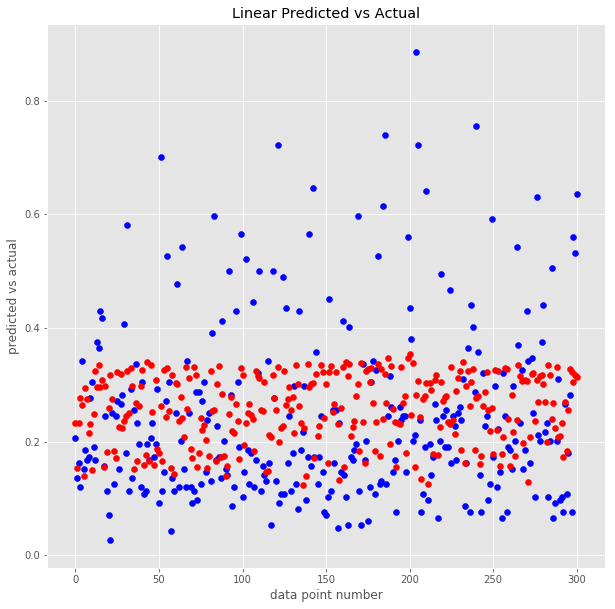

In [278]:
func = predPolTraf(1672, 1650, 200)